In [56]:
!pip3 install tqdm

  Using cached https://files.pythonhosted.org/packages/47/55/fd9170ba08a1a64a18a7f8a18f088037316f2a41be04d2fe6ece5a653e8f/tqdm-4.43.0-py2.py3-none-any.whl


In [2]:
%matplotlib inline 
import requests
import torch
import torch.nn as nn
from torch import hub as torchhub
from torchvision import transforms
from torchvision.models import mobilenet_v2
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision.datasets.folder import ImageFolder
from torch.optim import adam
from torch.optim import lr_scheduler
from tqdm.notebook import tqdm
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
model1 = torchhub.load('pytorch/vision:v0.5.0', 'mobilenet_v2',pretrained=True)
use_cuda = torch.cuda.is_available()

Using cache found in /home/stephen/.cache/torch/hub/pytorch_vision_v0.5.0


In [4]:
model = mobilenet_v2(pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)



cuda:0


In [32]:
transform = transforms.Compose([
    transforms.Resize([512,512]),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(brightness=[0.8,1.2],contrast=[0.8,1.2],saturation=[1,2],hue=[-0.2,0.2]),
    transforms.ToTensor()
    ])
mydata = ImageFolder(root="/home/stephen/dataset 1 (simplex)/Dataset 1 (Simplex)/Train data",transform=transform)
test_data = ImageFolder(root="/home/stephen/Dataset 1 (Simplex)/Train data",transform=transform)
test_data_loader = DataLoader(mydata,batch_size=16,shuffle=True,num_workers=0)

data_loader = DataLoader(mydata,batch_size=64,shuffle=True,num_workers=0)

In [6]:

model.classifier = nn.Sequential(nn.Dropout(p=0.2,inplace=True),
                                 nn.Linear(in_features=1280,out_features=len(mydata.classes)))

In [13]:
param_count = 0
for param in model.parameters():
    param.requires_grad = False
    param_count +=1
print(param_count)
param_count = 0
for param in model.classifier.parameters():
    param.requires_grad = True
    param_count +=1
print(param_count)

158
2


In [14]:
torch.cuda.empty_cache() 

loss = criteria = nn.CrossEntropyLoss()

model.train()
torch.cuda.set_device(device)
model.cuda(device=device)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [15]:
def train(epoch,learning_rate):
    losses = []
    
    optimizer = adam.Adam(model.parameters(),lr=learning_rate)
    lr_optim = lr_scheduler.CosineAnnealingLR(optimizer,len(data_loader))
    for e in range(0,epoch):
        for input,label in tqdm(data_loader):
            in_dat = input.to(device=device, dtype=torch.float)
            label = label.to(device=device, dtype=torch.long)
            optimizer.zero_grad()
            outputs = model(in_dat)
            loss = criteria(outputs,label)
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
        lr_optim.step()
    input = None
    label = None
    outputs = None
    loss = None
    optimizer = None
    lr_optim = None
    return losses



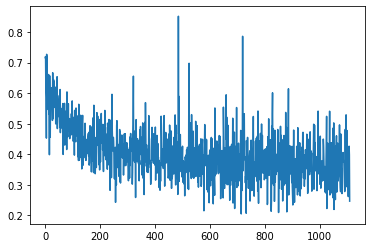

In [16]:
values = train(15,learning_rate=0.001)
plt.plot(values)

In [17]:
torch.save(model,'firststep.model')

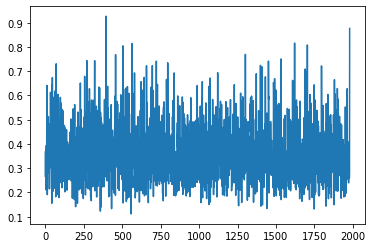

In [18]:
data_loader = DataLoader(mydata,batch_size=24,shuffle=True,num_workers=8)

param_count = 0
for param in model.parameters():
    if param_count > 130:
        param.requires_grad = True
values = train(10,learning_rate=0.0001)
plt.plot(values)   
torch.save(model,'secondstep.model')

In [19]:
for param in model.parameters():
    param.requires_grad = True

In [ ]:
values = train(30,learning_rate=0.00001)
plt.plot(values)

In [ ]:
torch.save(model,'secondstep.model')

In [13]:
torch.cuda.empty_cache() 
torch.cuda.ipc_collect()


In [ ]:
plt.plot(values)


In [ ]:
plt.savefig("finalstuff.jpg")

In [ ]:
torch.save(model,'stuff13.model')


In [ ]:
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    lr = args.lr * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


In [23]:
import os

In [24]:
os.listdir('.')



['.nv',
 '.jupyter',
 '.config',
 'firststep.model',
 '.bashrc',
 'finalstuff.jpg',
 'dataset 1 (simplex)',
 'ds1.zip',
 '.local',
 '.gnupg',
 'Dataset 1 (Simplex)',
 'secondstep.model',
 '.ipython',
 'stuff.model',
 '.keras',
 'nienaber-potholes-1-simplex.zip',
 '.sudo_as_admin_successful',
 '.bash_logout',
 '.pycharm_helpers',
 '.cache',
 '.bash_history',
 '.profile']

TypeError: Image data of dtype <U14 cannot be converted to float

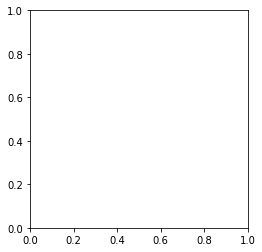

In [25]:
plt.imshow('finalstuff.jpg')

In [27]:
from PIL import Image


In [29]:
Image.open('finalstuff.jpg').show()

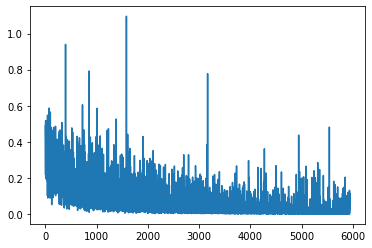

In [30]:
plt.plot(values)